In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Load dataset
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(file_path)

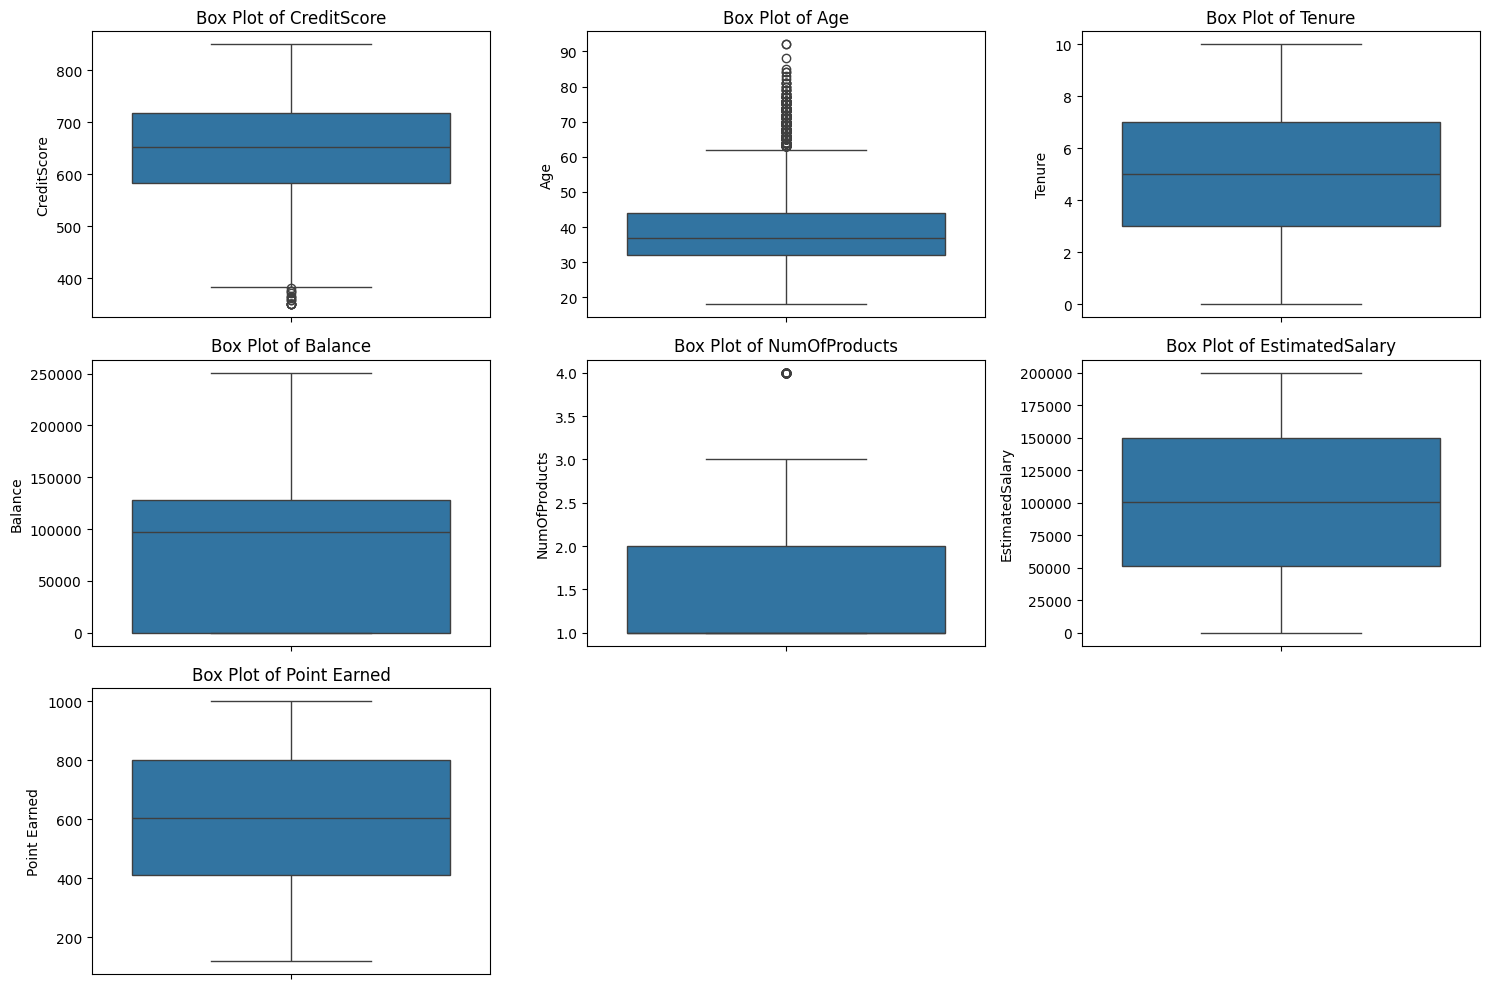

In [ ]:
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Point Earned"]

# Plot box plots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

In [ ]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Removing outliers for selected numerical columns
df_cleaned = df.copy()
for col in ["Age", "Balance", "Point Earned"]:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# Selecting features and target variable
features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts",
            "EstimatedSalary", "Point Earned", "Complain", "Satisfaction Score",
            "HasCrCard", "IsActiveMember"]

target = "Exited"

In [ ]:
# Function to train and evaluate models
def train_and_evaluate(df_data, dataset_type):
    X = df_data[features]
    y = df_data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # SVM Model
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    svm_pred = svm_model.predict(X_test)
    svm_acc = accuracy_score(y_test, svm_pred)

    # Random Forest Model
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_acc = accuracy_score(y_test, rf_pred)

    print(f"Results for {dataset_type} dataset:")
    print(f"SVM Accuracy: {svm_acc:.4f}")
    print(f"Random Forest Accuracy: {rf_acc:.4f}\n")

# Train and evaluate models on original and cleaned datasets
train_and_evaluate(df, "Original")
train_and_evaluate(df_cleaned, "Cleaned (No Outliers)")

Results for Original dataset:
SVM Accuracy: 0.9990
Random Forest Accuracy: 0.9990

Results for Cleaned (No Outliers) dataset:
SVM Accuracy: 0.9990
Random Forest Accuracy: 0.9990

